# Results for BERT when applying syn tranformation to the premise alone

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML 
from lr.stats.h_testing import get_boot_p_value
from lr.analysis.util import get_boots, show_df, get_standart_results

## Results for $\rho = 0$

In [2]:
df1 = pd.read_csv("results/snli/bert/sin_p/rho_0p00_dgp_seed_27_random_state_1104.csv")
df2 = pd.read_csv("results/snli/bert/sin_p/rho_0p00_dgp_seed_178_random_state_432.csv")
df_rho_0 = pd.concat([df1, df2]).reset_index(drop=True)
df_rho_0 = get_standart_results(df_rho_0)
show_df(df_rho_0)

,data,model,transformation,rho,dgp_seed,random_state,number_of_simulations,validation_accuracy,transformed_validation_accuracy,accuracy_difference,test_size,standart_error,observable_t_stats,p_value,training_time,test_time
0,snli,bert,wordnet sin tranformation p,0.0,27,1104,1000,0.856940,0.814164,0.042776,9842,0.275497,15.403674,0.0,5.256196,5.956873
1,snli,bert,wordnet sin tranformation p,0.0,178,432,1000,0.859073,0.817923,0.041150,9842,0.279768,14.592021,0.0,5.125148,5.821662


## Results for $\rho = 0.25$

In [3]:
df1 = pd.read_csv("results/snli/bert/sin_p/rho_0p25_dgp_seed_3_random_state_45.csv")
df2 = pd.read_csv("results/snli/bert/sin_p/rho_0p25_dgp_seed_90_random_state_18.csv")
df_rho_0p25 = pd.concat([df1, df2]).reset_index(drop=True)
df_rho_0p25 = get_standart_results(df_rho_0p25)
show_df(df_rho_0p25)

,data,model,transformation,rho,dgp_seed,random_state,number_of_simulations,validation_accuracy,transformed_validation_accuracy,accuracy_difference,test_size,standart_error,observable_t_stats,p_value,training_time,test_time
0,snli,bert,wordnet sin tranformation p,0.25,3,45,1000,0.854095,0.825544,0.028551,9842,0.249563,11.349695,0.0,3.934202,4.437278
1,snli,bert,wordnet sin tranformation p,0.25,90,18,1000,0.857752,0.830522,0.027230,9842,0.247463,10.916499,0.0,3.932224,4.436968


## Results for $\rho = 0.5$

In [4]:
df1 = pd.read_csv("results/snli/bert/sin_p/rho_0p50_dgp_seed_38_random_state_712.csv")
df2 = pd.read_csv("results/snli/bert/sin_p/rho_0p50_dgp_seed_122_random_state_411.csv")
df_rho_0p5 = pd.concat([df1, df2]).reset_index(drop=True)
df_rho_0p5 = get_standart_results(df_rho_0p5)
show_df(df_rho_0p5)

,data,model,transformation,rho,dgp_seed,random_state,number_of_simulations,validation_accuracy,transformed_validation_accuracy,accuracy_difference,test_size,standart_error,observable_t_stats,p_value,training_time,test_time
0,snli,bert,wordnet sin tranformation p,0.5,38,712,1000,0.855822,0.836009,0.019813,9842,0.228781,8.591589,0.0,3.956270,4.457993
1,snli,bert,wordnet sin tranformation p,0.5,122,411,1000,0.855009,0.837330,0.017679,9842,0.226053,7.758864,0.0,3.945771,4.448440


## Results for $\rho = 0.75$

In [5]:
df1 = pd.read_csv("results/snli/bert/sin_p/rho_0p75_dgp_seed_129_random_state_1453.csv")
df2 = pd.read_csv("results/snli/bert/sin_p/rho_0p75_dgp_seed_871_random_state_24.csv")
df_rho_0p75 = pd.concat([df1, df2]).reset_index(drop=True)
df_rho_0p75 = get_standart_results(df_rho_0p75)
show_df(df_rho_0p75)

,data,model,transformation,rho,dgp_seed,random_state,number_of_simulations,validation_accuracy,transformed_validation_accuracy,accuracy_difference,test_size,standart_error,observable_t_stats,p_value,training_time,test_time
0,snli,bert,wordnet sin tranformation p,0.75,129,1453,1000,0.850742,0.839565,0.011177,9842,0.215431,5.146875,0.0,5.264714,5.953146
1,snli,bert,wordnet sin tranformation p,0.75,871,24,1000,0.844849,0.831843,0.013005,9842,0.209589,6.156014,0.0,5.250402,5.938955


## Results for $\rho = 1.0$

In [6]:
df1 = pd.read_csv("results/snli/bert/sin_p/rho_1p00_dgp_seed_158_random_state_85.csv")
df2 = pd.read_csv("results/snli/bert/sin_p/rho_1p00_dgp_seed_1013_random_state_31.csv")
df_rho_1p0 = pd.concat([df1, df2]).reset_index(drop=True)
df_rho_1p0 = get_standart_results(df_rho_1p0)
show_df(df_rho_1p0)

,data,model,transformation,rho,dgp_seed,random_state,number_of_simulations,validation_accuracy,transformed_validation_accuracy,accuracy_difference,test_size,standart_error,observable_t_stats,p_value,training_time,test_time
0,snli,bert,wordnet sin tranformation p,1.0,158,85,1000,0.851758,0.839870,0.011888,9842,0.207463,5.684643,0.0,3.963439,4.478318
1,snli,bert,wordnet sin tranformation p,1.0,1013,31,1000,0.853790,0.843528,0.010262,9842,0.201590,5.050230,0.0,3.945335,4.458934


## Plotting Results

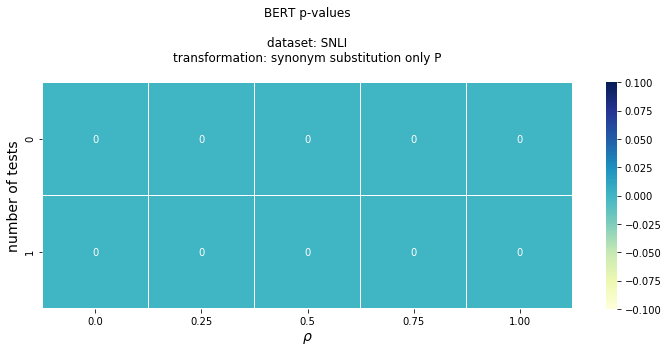

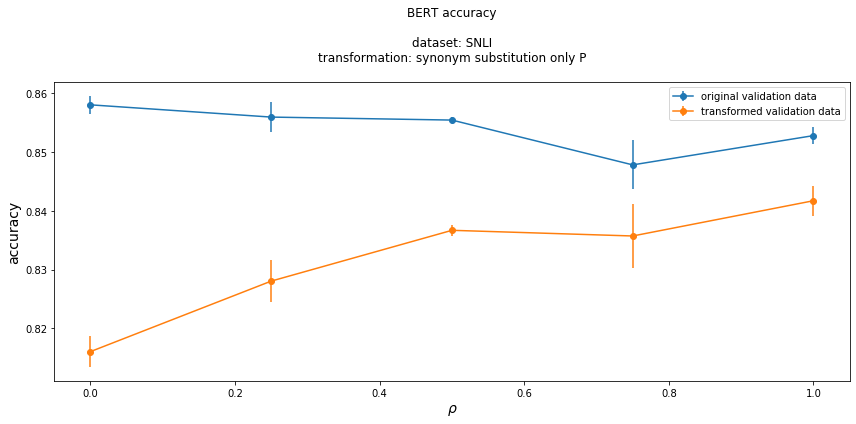

In [10]:
dfs = [df_rho_0, df_rho_0p25, df_rho_0p5, df_rho_0p75, df_rho_1p0]
names = ["0.0", "0.25", "0.5", "0.75", "1.00" ]

all_p_values = {}
for df, name in zip(dfs, names):
    results = df.p_value
    all_p_values[name] = results 

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(pd.DataFrame(all_p_values), annot=True,  cmap="YlGnBu", linewidths=0.3, ax=ax);
ax.set_xlabel(r"$\rho$", fontsize=14);
ax.set_ylabel("number of tests", fontsize=14);
ax.set_title("BERT p-values\n\ndataset: SNLI\ntransformation: synonym substitution only P\n");
fig.tight_layout()
fig.savefig('figs/bert_p_values_snli_sin_p.png', bbox_inches=None, pad_inches=0.5)

rhos = []
acc_s = []
acc_t_s = []

for df in dfs:
    acc = df.validation_accuracy.values
    acc_s.append(acc)
    acc_t = df.transformed_validation_accuracy.values
    acc_t_s.append(acc_t)
    rhos.append(df.rho.values[0])
acc_s = np.array(acc_s)
acc_t_s = np.array(acc_t_s)

acc_c = ["acc_{}".format(i) for i in range(acc_s.shape[1])]
acc_t_c = ["acc_t_{}".format(i) for i in range(acc_t_s.shape[1])]

acc = pd.DataFrame(acc_s, index=rhos, columns=acc_c)
acc.index.name = "rho"
acc_t = pd.DataFrame(acc_t_s, index=rhos, columns=acc_t_c)
acc_t.index.name = "rho"

x = acc.mean(1).index
y = acc.mean(1).values
error = acc.std(1).values

x_t = acc_t.mean(1).index
y_t = acc_t.mean(1).values
error_t = acc_t.std(1).values


fig, ax = plt.subplots(figsize=(12,6))
ax.errorbar(x, y, yerr=error, fmt='-o', label="original validation data");
ax.errorbar(x_t, y_t, yerr=error_t, fmt='-o', label="transformed validation data");
ax.legend(loc="best");
ax.set_xlabel(r"$\rho$", fontsize=14);
ax.set_ylabel("accuracy", fontsize=14);
ax.set_title("BERT accuracy\n\ndataset: SNLI\ntransformation: synonym substitution only P\n");
fig.tight_layout()
fig.savefig('figs/bert_acc_snli_sin_p.png', bbox_inches=None, pad_inches=0.5)


In [8]:
pd.DataFrame(all_p_values)

,0.0,0.25,0.5,0.75,1.00
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
